In [1]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 

In [2]:
# Load dataset
data = pd.read_csv('source/data.csv')

In [3]:
# Suppress specific future warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447670 entries, 0 to 447669
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AccID                       447670 non-null  int64  
 1   day                         447670 non-null  int64  
 2   month                       447670 non-null  int64  
 3   year                        447670 non-null  int64  
 4   time                        447670 non-null  int64  
 5   lum                         447670 non-null  int64  
 6   atm_condition               447670 non-null  int64  
 7   collision_type              447670 non-null  int64  
 8   lat                         447670 non-null  float64
 9   long                        447670 non-null  float64
 10  route_category              447670 non-null  int64  
 11  traffic_regime              447670 non-null  int64  
 12  total_number_lanes          447670 non-null  int64  
 13  reserved_lane_

In [5]:
# Step 1: Define Categorical and Numerical Columns
categorical_cols = ['atm_condition', 'collision_type', 'route_category', 'traffic_regime', 'reserved_lane_code', 'longitudinal_profile','plan','surface_condition', 'infra', 'accident_situation', 'traffic_direction', 'vehicle_category', 'fixed_obstacle', 'mobile_obstacle', 'initial_impact_point', 'manv', 'user_category', 'gender', 'reason_travel', 'safety_equipment1']
numerical_cols = ['maximum_speed', 'age', 'lat', 'long', 'upstream_terminal_number', 'distance_upstream_terminal', 'total_number_lanes']
target_col = 'gravity'

In [6]:
# Step 2: Preprocessing Pipelines
# Preprocessing for numerical data (imputation + scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data (imputation + one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # Set sparse_output=False to return dense matrix
])

# Preprocessing for the target variable (ordinal encoding)
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

In [7]:
# Step 3: Combine all transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [8]:
# Step 4: Separate the target variable and features
X = data.drop(columns=[target_col])
y = data[[target_col]]  # Keep as DataFrame for consistency

# Apply ordinal encoding to the target variable
y = ordinal_transformer.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 5: Fit and transform the training data (ensure dense output for categorical features)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [10]:
# Step 6: Convert the processed data back to DataFrames
# Get the feature names from the OneHotEncoder and merge with numerical features
encoded_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols + list(encoded_columns)

In [11]:
# Convert the processed arrays back to DataFrames with proper column names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_columns)

In [13]:
# Step 1: Visualize histograms for numerical features
def plot_histograms(df, numerical_cols):
    df[numerical_cols].hist(bins=20, figsize=(14,10))
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

In [14]:
# Step 2: Visualize bar plots for categorical (one-hot encoded) features
def plot_barplots(df, categorical_cols):
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(2, 3, i)  # Adjust grid size as per number of columns
        sns.countplot(x=col, data=df)
        plt.title(f'Bar Plot of {col}')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [15]:
# Step 3: Correlation heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

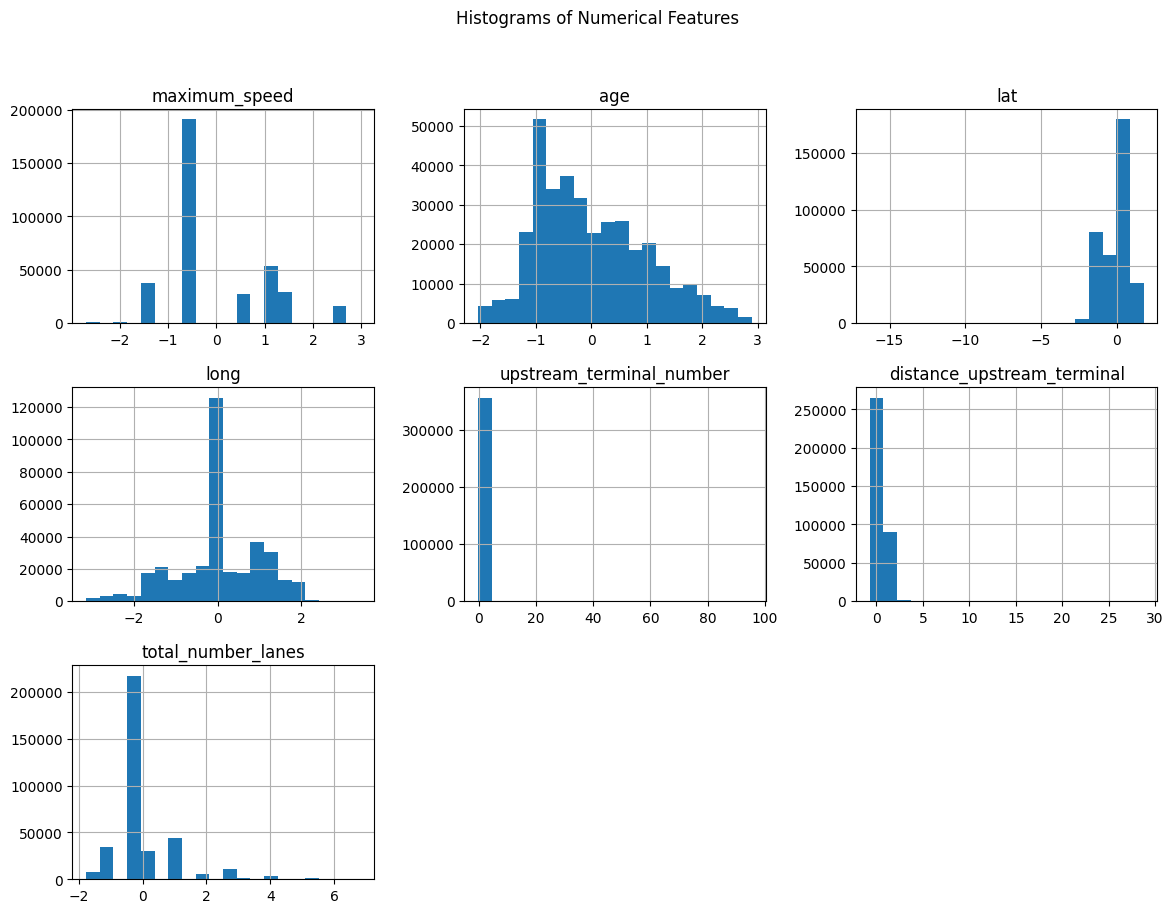

In [16]:
# Plot histograms of the numerical features
plot_histograms(X_train_preprocessed_df, numerical_cols)

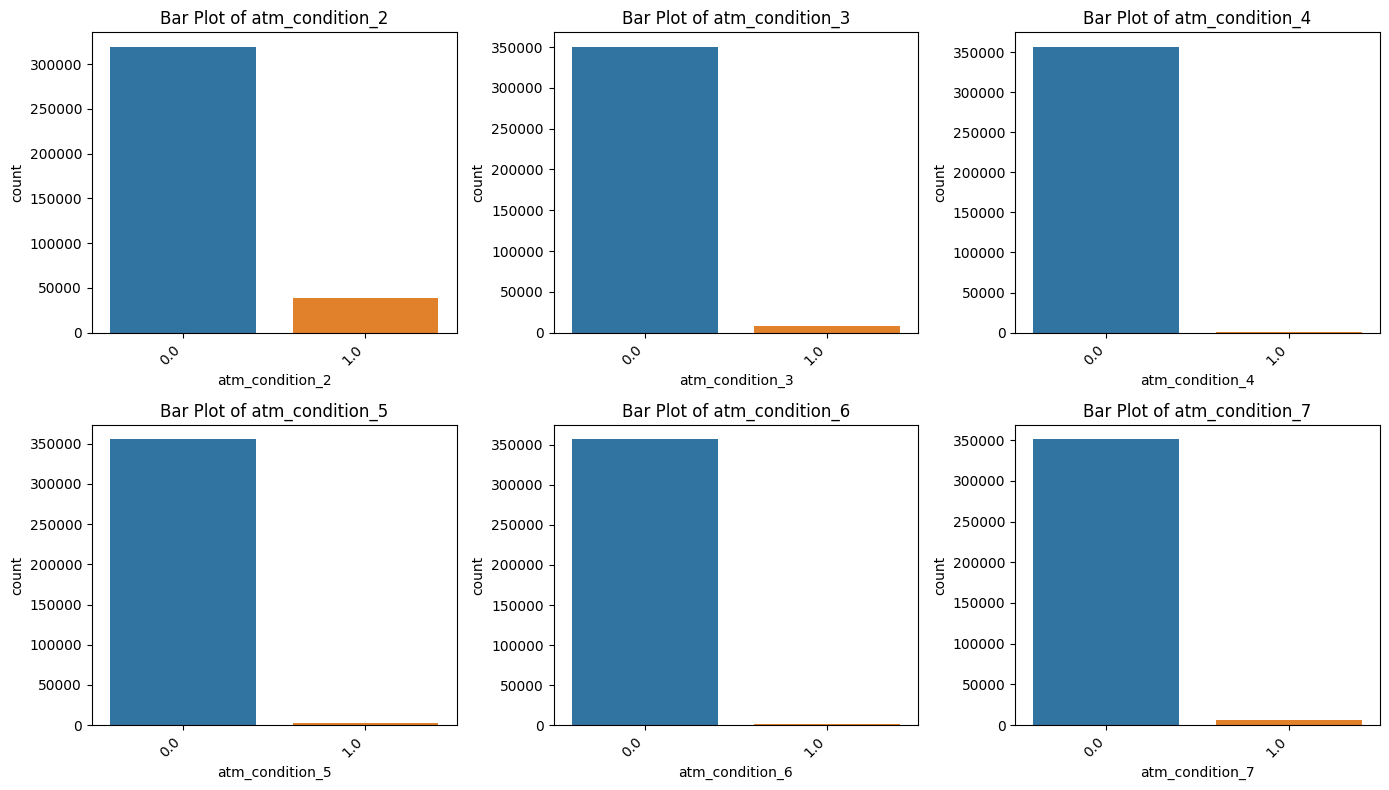

In [19]:
# Plot bar plots of a subset of the categorical features (if necessary, as one-hot encoded variables are binary)
encoded_columns = X_train_preprocessed_df.columns[len(numerical_cols):]  
plot_barplots(X_train_preprocessed_df, encoded_columns[:6])  

In [21]:
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Train the model
log_reg_model.fit(X_train, y_train)

ValueError: could not convert string to float: '792\xa0520'